In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Utils
from sklearn.preprocessing import StandardScaler

In [ ]:
kartRecord = pd.read_csv('data/Kart2.csv')
display(kartRecord)

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
0,-1.0,6.521043,4.611090,6.489725,4.588912,15.98893,0.275615,3.105009,0.373333,NONE
1,-1.0,6.520910,4.611073,6.489857,4.588929,15.98893,0.275714,3.105008,0.433952,NONE
2,-1.0,6.520908,4.611071,6.489859,4.588931,15.98893,0.275727,3.105008,0.453257,NONE
3,-1.0,6.520905,4.611069,6.489862,4.588933,15.98893,0.275732,3.105008,0.465425,NONE
4,-1.0,6.520902,4.611067,6.489864,4.588934,15.98893,0.275744,3.105008,0.513547,NONE
...,...,...,...,...,...,...,...,...,...,...
244,-1.0,7.639052,5.240210,5.443144,3.963899,15.35748,0.279180,27.426280,24.503820,NONE
245,-1.0,7.685861,5.272271,5.399075,3.931840,15.32558,0.279183,28.494010,24.601670,NONE
246,-1.0,7.735830,5.306497,5.352030,3.897616,15.29168,0.279187,29.628620,24.714140,NONE
247,-1.0,7.770543,5.330274,5.319351,3.873841,15.26649,0.279190,30.471240,24.804520,NONE


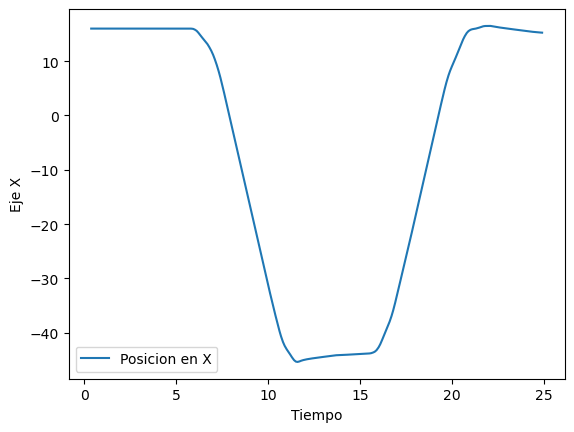

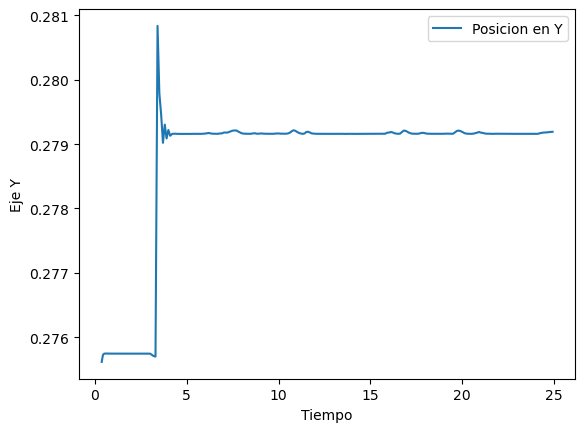

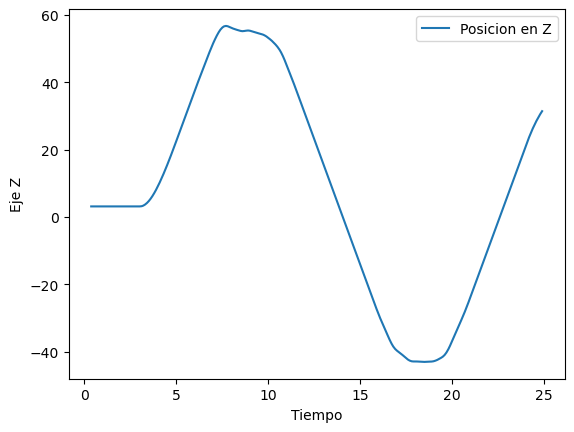

In [ ]:
output = kartRecord[['action']]
kartRecord = kartRecord.drop(['action'], axis=1)
plt.plot(kartRecord['time'], kartRecord['kartx'], label='Posicion en X')
plt.xlabel("Tiempo")
plt.ylabel("Eje X")
plt.legend()

plt.show()

plt.plot(kartRecord['time'], kartRecord['karty'], label='Posicion en Y')
plt.xlabel("Tiempo")
plt.ylabel("Eje Y")
plt.legend()

plt.show()

plt.plot(kartRecord['time'], kartRecord['kartz'], label='Posicion en Z')
plt.xlabel("Tiempo")
plt.ylabel("Eje Z")
plt.legend()

plt.show()

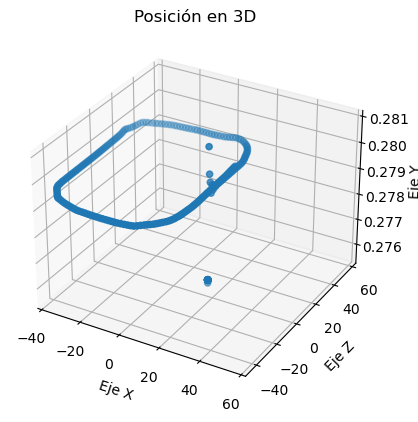

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(kartRecord['kartx'], kartRecord['kartz'], kartRecord['karty'], label='Posicion del kart en el cada instante')

# Ajustamos el rango del eje X a representar para mantener la proporcion.
# Asi la grafica corresponde al recorrido "real" del kart
ax.set_xlim(-40,60)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Z')
ax.set_zlabel('Eje Y')
ax.set_title('Posición en 3D')

plt.show()

In [ ]:

kartRecord = kartRecord.drop('karty', axis = 1)
kartRecord = kartRecord.drop('time', axis = 1)
normalize_data = kartRecord.columns
values= kartRecord[normalize_data]

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler y transformar las características
normalized_features = scaler.fit_transform(values)

# Reemplazar las características originales con las normalizadas en el DataFrame
kartRecord[normalize_data] = normalized_features
display(kartRecord)

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time
0,-0.204428,0.436383,0.353435,0.494957,0.412678,0.908194,-2.648144,-0.144546,-1.689678
1,-0.204428,0.436333,0.353425,0.495004,0.412687,0.908194,-2.564134,-0.144546,-1.681239
2,-0.204428,0.436332,0.353423,0.495004,0.412688,0.908194,-2.552972,-0.144546,-1.678551
3,-0.204428,0.436331,0.353422,0.495006,0.412689,0.908194,-2.547945,-0.144546,-1.676857
4,-0.204428,0.436330,0.353421,0.495006,0.412689,0.908194,-2.538488,-0.144546,-1.670158
...,...,...,...,...,...,...,...,...,...
244,-0.204428,0.856416,0.724429,0.124269,0.085309,0.883279,0.389611,0.627897,1.669717
245,-0.204428,0.874002,0.743335,0.108660,0.068517,0.882020,0.391741,0.661808,1.683339
246,-0.204428,0.892775,0.763518,0.091997,0.050591,0.880682,0.395320,0.697843,1.698997
247,-0.204428,0.905817,0.777540,0.080422,0.038139,0.879688,0.397961,0.724605,1.711579


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output = False)
output_encoded = onehot_encoder.fit_transform(output)

output_encoded = pd.DataFrame(output_encoded,columns=onehot_encoder.get_feature_names_out(['action']))
complete_stats = pd.concat([kartRecord,output_encoded] , axis = 1)

display(complete_stats)

,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action_ACCELERATE,action_LEFT_ACCELERATE,action_NONE,action_RIGHT_ACCELERATE
0,-0.204428,0.436383,0.353435,0.494957,0.412678,0.908194,-2.648144,-0.144546,-1.689678,0.0,0.0,1.0,0.0
1,-0.204428,0.436333,0.353425,0.495004,0.412687,0.908194,-2.564134,-0.144546,-1.681239,0.0,0.0,1.0,0.0
2,-0.204428,0.436332,0.353423,0.495004,0.412688,0.908194,-2.552972,-0.144546,-1.678551,0.0,0.0,1.0,0.0
3,-0.204428,0.436331,0.353422,0.495006,0.412689,0.908194,-2.547945,-0.144546,-1.676857,0.0,0.0,1.0,0.0
4,-0.204428,0.436330,0.353421,0.495006,0.412689,0.908194,-2.538488,-0.144546,-1.670158,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.204428,0.856416,0.724429,0.124269,0.085309,0.883279,0.389611,0.627897,1.669717,0.0,0.0,1.0,0.0
245,-0.204428,0.874002,0.743335,0.108660,0.068517,0.882020,0.391741,0.661808,1.683339,0.0,0.0,1.0,0.0
246,-0.204428,0.892775,0.763518,0.091997,0.050591,0.880682,0.395320,0.697843,1.698997,0.0,0.0,1.0,0.0
247,-0.204428,0.905817,0.777540,0.080422,0.038139,0.879688,0.397961,0.724605,1.711579,0.0,0.0,1.0,0.0


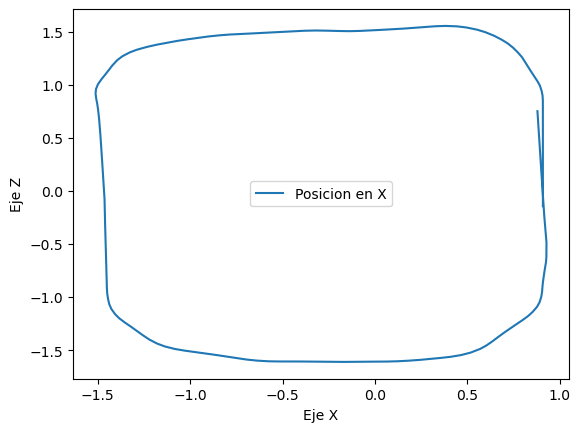

In [ ]:
plt.plot(kartRecord['kartx'], kartRecord['kartz'], label='Posicion en X')
plt.xlabel("Eje X")
plt.ylabel("Eje Z")
plt.legend()

plt.show()
